<a href="https://colab.research.google.com/github/ellenrpaes/Data_Science_Projects/blob/master/Fraud_Detection_on_credit_cards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img alt="Colaboratory logo" width="100%" src="https://github.com/ellenrpaes/Datasets_and_Images/blob/master/cartao%20fraude.png?raw=true">


#### **FRAUD DETECTION ON CREDIT CARDS**
*by [Ellen Paes](https://www.linkedin.com/in/ellenpaes)*


---

According to The Nilson Report, a leading global card and mobile payment publication and a respected news source in this segment, consumer credit card consumption in the world is projected to reach **57** trillion dollars in the world and a projection of fraud is **35.7** billion dollars.

<p align=center>
<img src="https://github.com/ellenrpaes/Datasets_and_Images/blob/master/Dados_NR.PNG?raw=true" width="100%"></p>

As we can see in the charts published by The Nilson Report and reproduced above, we will see substantial increases in transactions occurring around the world until 2028, mainly in Asia / Pacific, which includes the countries of Oceania, the Far East, and South Asia.

Naturally, the fraud increasing represents significant losses for businesses projecting up to $40 billion. However, we can observe that for every 100 dollars spent within this projection until 2027, will be a reduction in the amount that will be diverted. Its indicates the segment's effort to promote initiatives aimed at fighting fraud, some of which are mentioned below:

* Guidelines for credit card users.
* Use of tokens and pins during transactions.
* Use of advanced data analysis techniques, such as Machine Learning to detect possible fraudulent transactions and preventive card blocks.

When we are using Machine Learning, it is extremely important that the developer of this solution is aware of the quality of the data collected and seeks a classification model that avoids as much as possible that an honest user goes through a negative experience of a denied purchase. I highlight that the machine learning application for fraud prevention has been around for a long time since the nineties what has changed in this period were the techniques and robustness with which the algorithms started to be applied and combined to generate learning and agility daily processing of thousands of transactions.




## **Data Collecting**

The data used in this project has been available by European credit card companies and represents two days of operation. We have 492 transactions classified as frauds in almost 290k transactions realized.  We have a strongly unbalanced data with frauds operation representing only **0.17%** of the total of transactions.

Another interesting detail is that the features are all numerics, and were uncharacterized (due to problems related to privacy and security). Thus, the column names are represented by [V1, V2, V3 ... V28] after a transformation is known as Principal Component Analysis (PCA) has been applied, which is a technique that allows the dimensionality reduction while maintaining as much information as possible. To achieve this, the algorithm finds a new set of resources - the so-called components that can be less than or equal to the original variables.

The dataset and some additional information can be found in [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).


Below we are importing some libraries that will be used during this project.

In [1]:
# hide warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
svc = SVC()
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from imblearn.under_sampling import RandomUnderSampler

from collections import Counter
from IPython.display import Image  
import pydotplus

# Configuring the notebook
sns.set()
%matplotlib inline

As we can see through the first 5 rows of the dataset, the variables `Time` and `Amount`  have not undergone any transformation process.

In [3]:
# Importing dataset
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

# Checking first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Using the code below, we can identify the size of our dataset, the number of existing columns, the type of data and the amount of non-null data. It is already a good clue to explore about missing data.

In [4]:
# Checking dataset size

print('Informações sobre o dataset')
print('Features:\t{}'.format(df.shape[1]))
print('Entries:\t{}'.format(df.shape[0]))

# Checking the types of variables
display(df.info())

Informações sobre o dataset
Features:	31
Entries:	284807
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  floa

None

It was already possible to observe that there was no null data, but the code below also has the same effect and can be quickly used.

In [5]:
# Checking for null values
df.isnull().sum().max()

0

Using the method `describe()` we can visualize the statistical distribution of the data frame. Using this method, we have information that can help us:

* Identify outliers.
* Better understand the distribution of data.
* Identify flaws in the data distribution.
* After cleaning the data, check the effectiveness and differences between treated and untreated data.


We will apply this functionality only to the variables that are not transformed: `Time` and `Amount`. For the variable `Time` (time in seconds), it was not possible to identify discrepancies. 

Relate to the variable `Amount`, we observe that the average value of transactions (considering both classes) is 88.34, median equal to 22.00, and standard deviation of 250.12. The maximum transaction was 25,691.16 and most transactions were smaller amounts - as expected.


In [6]:
df[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


As we can see in the graph below, this is an unbalanced dataset because the fraud event has a low amount of transactions. We must adjust it before applying machine learning techniques to avoid biased models. We will talk later on how to balance this data.

0    284315
1       492
Name: Class, dtype: int64

Fraud class represents 0.17% of Dataset.



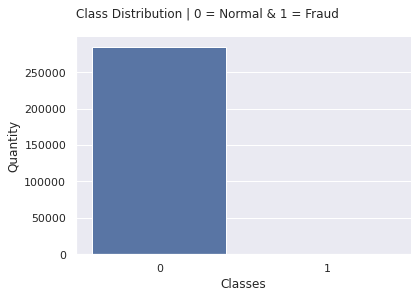

In [7]:
# checking the distribution of the target variable
print(df.Class.value_counts())
print("\nFraud class represents {:.2f}% of Dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotting bar graph
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Class Distribution | 0 = Normal & 1 = Fraud', loc='left', pad=20)
ax.set_xlabel('Classes')
ax.set_ylabel('Quantity')

sns.despine(fig)
plt.show()

We plot two graphs to compare the distributions of both classes for the `Time` variable. However, we didn't find any information in frequency distributions that could contribute to the analysis.

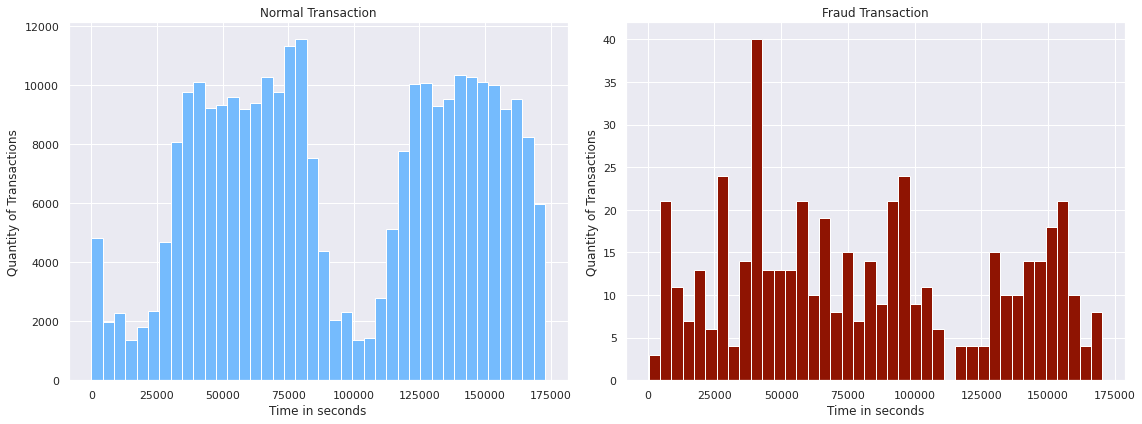

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color='#75bbfd')
ax[0].set_title('Normal Transaction')
ax[0].set_xlabel('Time in seconds')
ax[0].set_ylabel('Quantity of Transactions')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color='#8f1402')
ax[1].set_title('Fraud Transaction')
ax[1].set_xlabel('Time in seconds')
ax[1].set_ylabel('Quantity of Transactions')
plt.tight_layout()

We plot two graphs to compare the distributions of both classes for the `Amount` variable. It is possible to observe that a large part of fraudulent transactions is concentrated in smaller amounts.

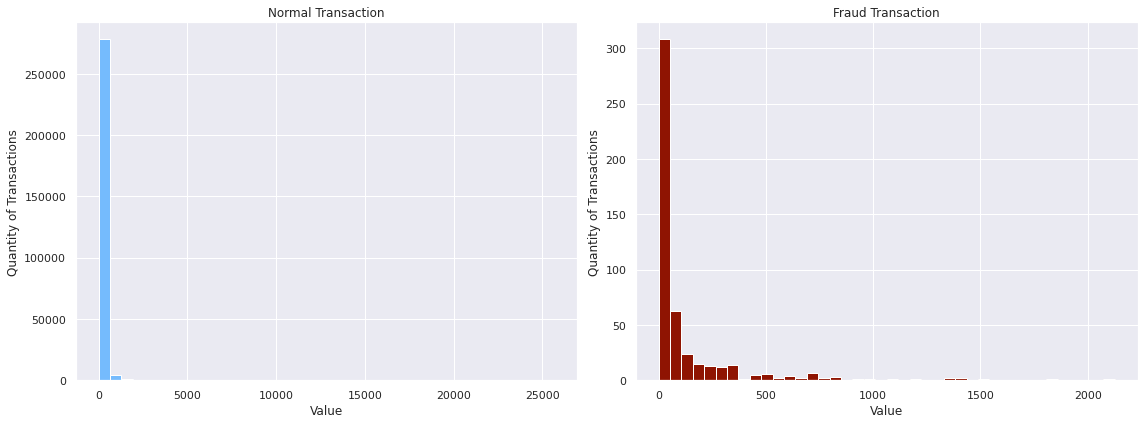

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

num_bins = 40

ax[0].hist(df.Amount[df.Class == 0], bins=num_bins, color='#75bbfd')
ax[0].set_title('Normal Transaction')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Quantity of Transactions')

ax[1].hist(df.Amount[df.Class == 1], bins=num_bins, color='#8f1402')
ax[1].set_title('Fraud Transaction')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Quantity of Transactions')

plt.tight_layout()

We plot the boxplots to identify any difference in the `Time` and `Amount` transaction pattern. For the `Time` variable, there are no relevant comments. However, for variable `Amount`, we have a different distribution between the classes, which will probably contribute to the training of the machine learning model.

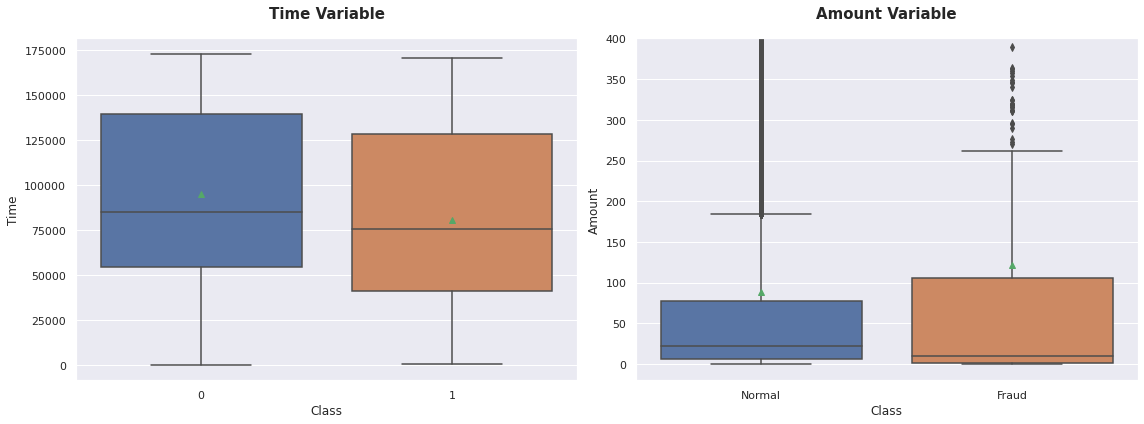

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.boxplot(df.Class, df.Time, showmeans=True, ax=ax[0])
plt.xticks([0, 1], ['Normal', 'Fraud'])
ax[0].set_title('Time Variable',fontsize=15, fontweight='bold',pad=20)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax[1])
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraud'])
ax[1].set_title('Amount Variable',fontsize=15, fontweight='bold',pad=20)

plt.tight_layout()

The density graph is useful for comparing each variable distributions for each class and see which ones are most important for anomaly detection. In this type of visualization, we are looking for distributions that differ from one another, allowing fraud to be identified more easily. See as an example the variables `V3`, `V4`, `V10` , `V11`, `V12`, `V14` and `V17` how they are very distinct. On the other hand, variables such as `V8`, `V13` and `V15` are very similar, showing approximately the same behavior.

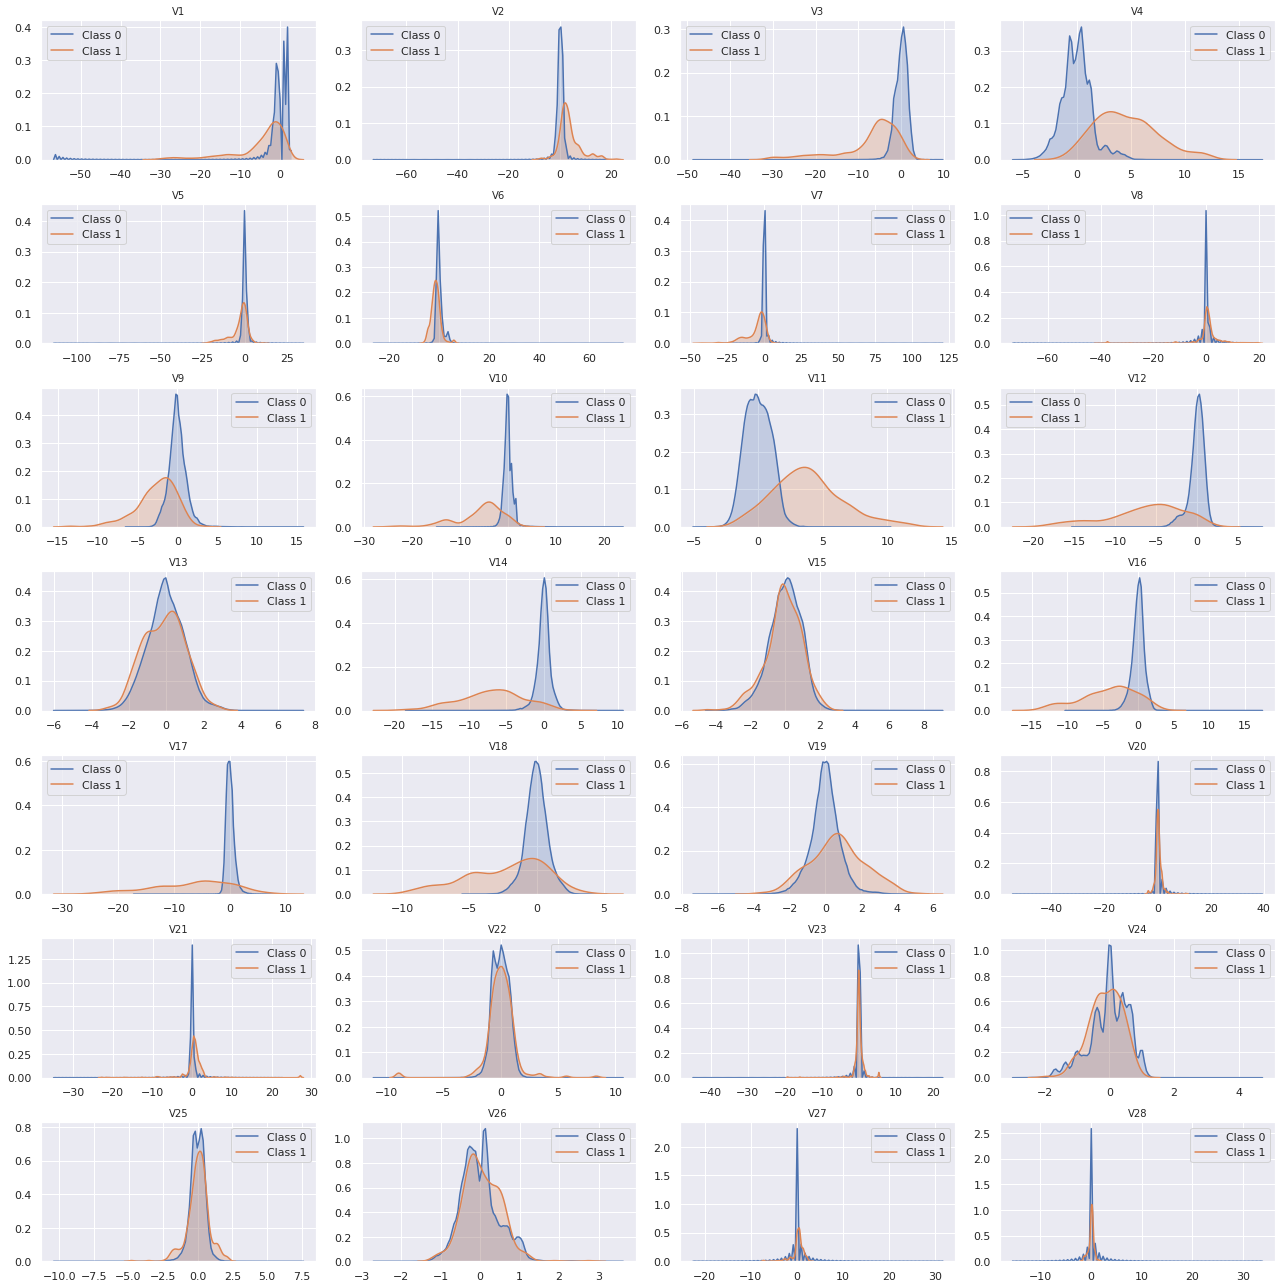

In [11]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()


As our dataset is unbalanced, we will see below that the correlation graph does not contain any relevant information.

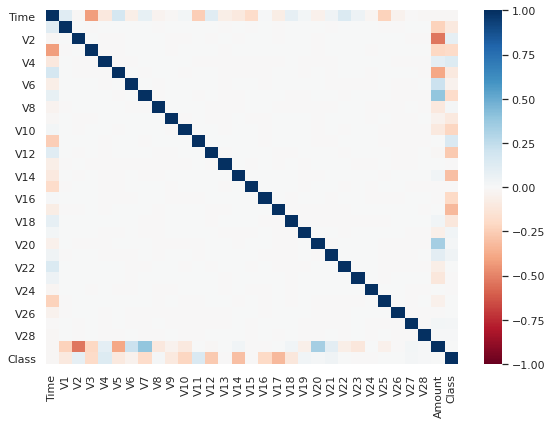

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, cmap='RdBu', vmin=-1)

plt.tight_layout()
plt.show()

# Data Preparation

To feed the classification models that we will build, in this preparation phase, we will:
* Standardize the Time and Amount features, which are in another order of magnitude.
* Split dataset between training and test data
* Balance the data to avoid poor performance for class 1 and overfitting.

**1. Standardize `Time` and `Amount`**

For this step, standardization will be used through the `StandardScaler` class.

In [13]:
# Standardize the Time e Amount columns
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# Checking 5 first rows
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**2. Split dataset between training and test sets**

Before proceeding with data balancing, we must split the existing data between training and testing. Otherwise, we will have no parameters to check whether the balance was adequate. To ensure that the training and test sets have the same amount of classes proportionally, we pass stratify = True.

In [14]:
# Splitting variable y and x
X = df_clean.drop('Class', axis=1)
y = df['Class']

# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

**3. Balancing the data**

Using the library `imblearn`, it is possible to apply data balancing techniques. In this case, the option in this project was to use **Under-sampling**, preserving the minority class. It is easy to see that there is no longer that initial discrepancy.

1    369
0    369
dtype: int64


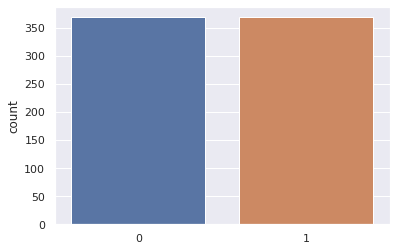

In [15]:
# applying under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# checking classes balancing
print(pd.Series(y_rus).value_counts())

# plotting the new class distribution
sns.countplot(y_rus);

After balanced data, we can see the correlation matrix and identify which variables are most strongly related to the others. Note how previously, without balancing data, the correlation matrix did not contain any relevant information. However, it brings much more information after a correct balance.

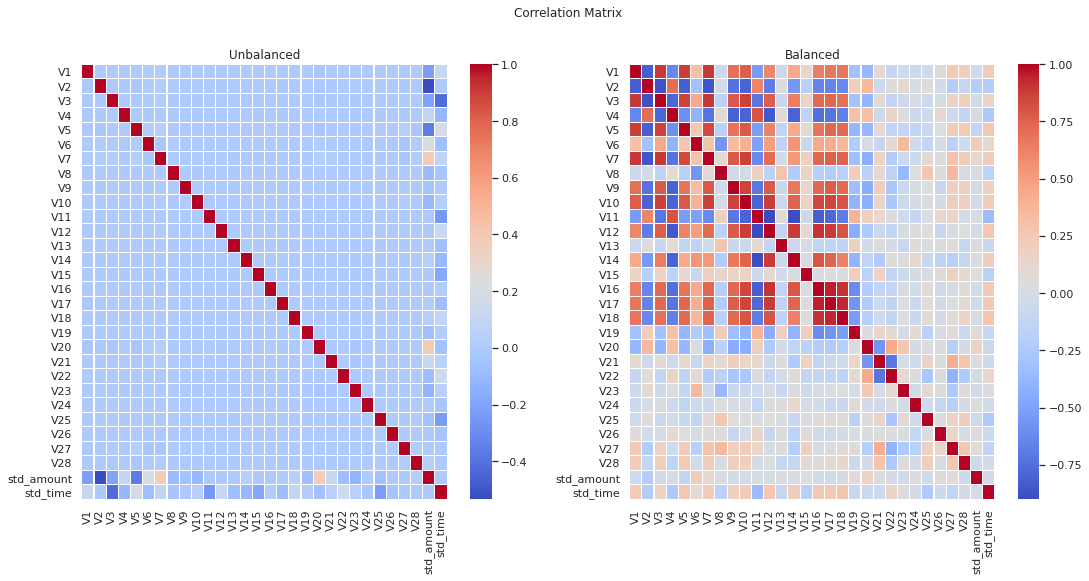

In [16]:
# plot a correlation matrix
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Correlation Matrix')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Unbalanced')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanced')

plt.show()

# Machine Learning Model
We have a classified problem with structured data, so we will use in this project the following algorithms to analyze results:
Serão utilizados nesse projeto os seguintes algorítmos:

*   **Logistic Regression**
*   **SVM**
*   **Random Forest**
*   **Decision Tree**
*   **XGBoost**

In the end, we will prepare a table to have a more intuitive comparison between the performance of each model and define the choice that best meets the requirements of this problem.



### **Logistic Regression**

In [17]:
# instantiate and train a Logistic Regression model
np.random.seed(2)
LogisticRegressionModel = LogisticRegression()

# apply cross validation
results = cross_val_score(LogisticRegressionModel, X_rus, y_rus, cv = 10, scoring = 'recall')

LogisticRegressionModel.fit(X_rus, y_rus)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.90      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     71202



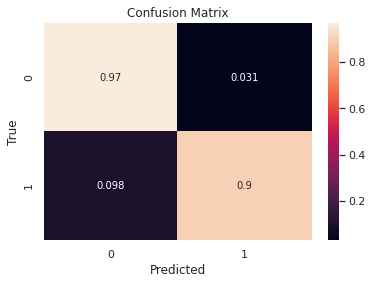

ROC AUC Score: 0.9359


In [18]:
# make predictions to train dataset
y_pred_LR = LogisticRegressionModel.predict(X_test)
y_proba = LogisticRegressionModel.predict_proba(X_test)

# print report
def report(pred):
    print(classification_report(y_test, y_pred_LR))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_LR, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_LR), 4)}')

report(LogisticRegressionModel)

### **SVM**

In [19]:
np.random.seed(2)
SVMmodel = SVC()
results = cross_val_score(SVMmodel, X_rus, 
                          y_rus, cv = 10, scoring = 'recall')

SVMmodel.fit(X_rus, y_rus)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.08      0.86      0.15       123

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.57     71202
weighted avg       1.00      0.98      0.99     71202



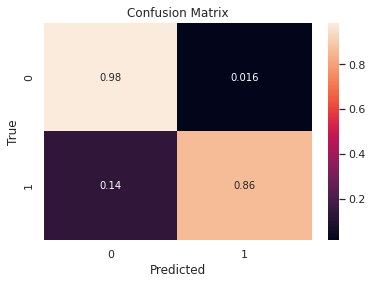

ROC AUC Score: 0.9228


In [20]:
# make predictions to train dataset
y_pred_SVM = SVMmodel.predict(X_test)

# print report
def report(pred):
    print(classification_report(y_test, y_pred_SVM))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_SVM, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_SVM), 4)}')

report(SVMmodel)

### **Random Forest**

In [21]:
# creating and training the model
seed = 2
RandomForestModel = RandomForestClassifier(n_jobs = -1,
                            n_estimators= 1000,
                            max_features= 0.3,
                            max_depth= 3,
                            min_samples_leaf= 3,
                            random_state= seed, verbose= 0, oob_score = 5)

# cross validation Random Forest Classifier
results = cross_val_score(RandomForestModel, X_rus, 
                          y_rus, cv = 5, scoring = 'recall')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.09      0.88      0.16       123

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.58     71202
weighted avg       1.00      0.98      0.99     71202



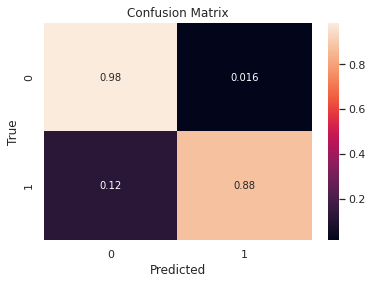

ROC AUC Score: 0.9313


In [22]:
# make predictions to train dataset
RandomForestModel.fit(X_rus, y_rus)
y_pred_RF = RandomForestModel.predict(X_test)
y_proba = RandomForestModel.predict_proba(X_test)

# print report 
def report(pred):
    print(classification_report(y_test, y_pred_RF))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_RF, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_RF), 4)}')

report(RandomForestModel)

Identify the most important features of the model result.

In [23]:
# calculating features importance for Random Forest
feature_importances = pd.DataFrame(RandomForestModel.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

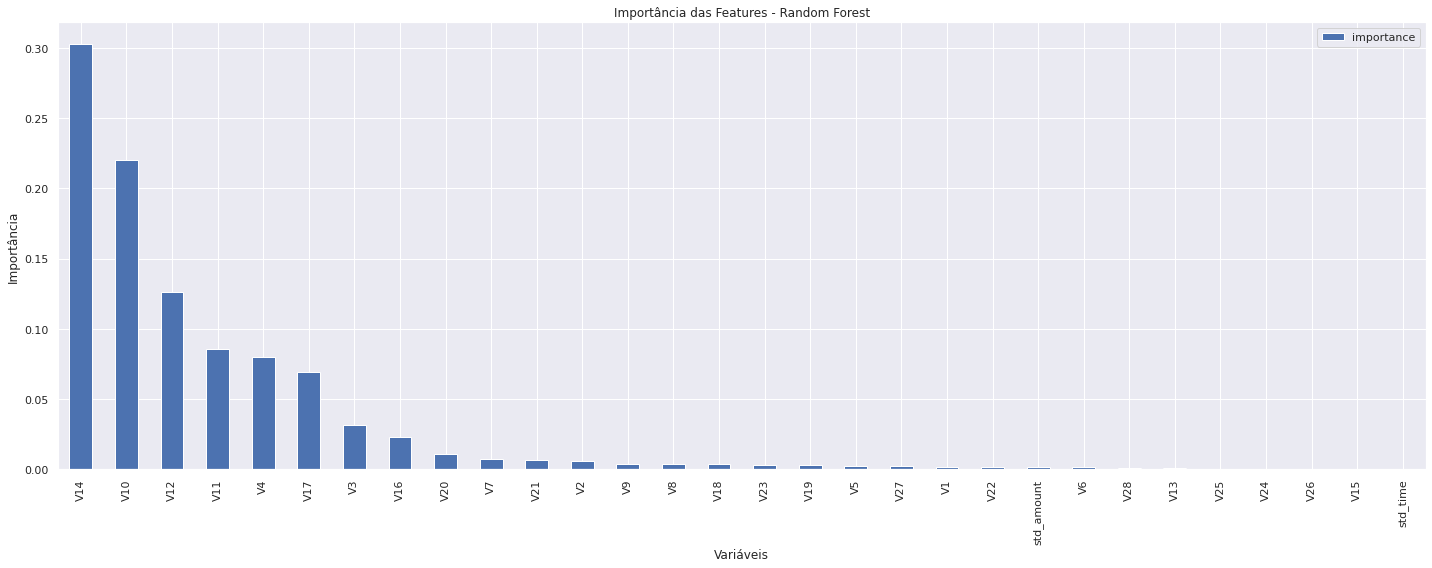

In [24]:
# plot the bar graph for most important variables
fig, ax = plt.subplots(figsize=(20,8))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - Random Forest")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")

plt.tight_layout()

### **Decision Tree**

In [25]:
DecisionTreeModel = DecisionTreeClassifier(max_depth=4, criterion="entropy")

# Model Fit
DecisionTreeModel.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.76      0.80       123

    accuracy                           1.00     71202
   macro avg       0.92      0.88      0.90     71202
weighted avg       1.00      1.00      1.00     71202



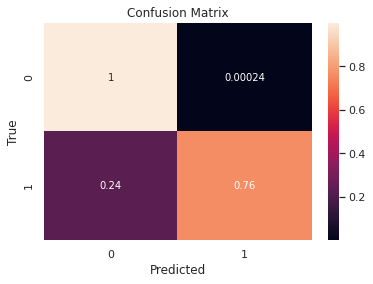

ROC AUC Score: 0.882


In [26]:
# make predictions
y_pred_DT = DecisionTreeModel.predict(X_test)

## print report
def report(pred):
    print(classification_report(y_test, y_pred_DT))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_DT, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_DT), 4)}')

report(DecisionTreeModel)

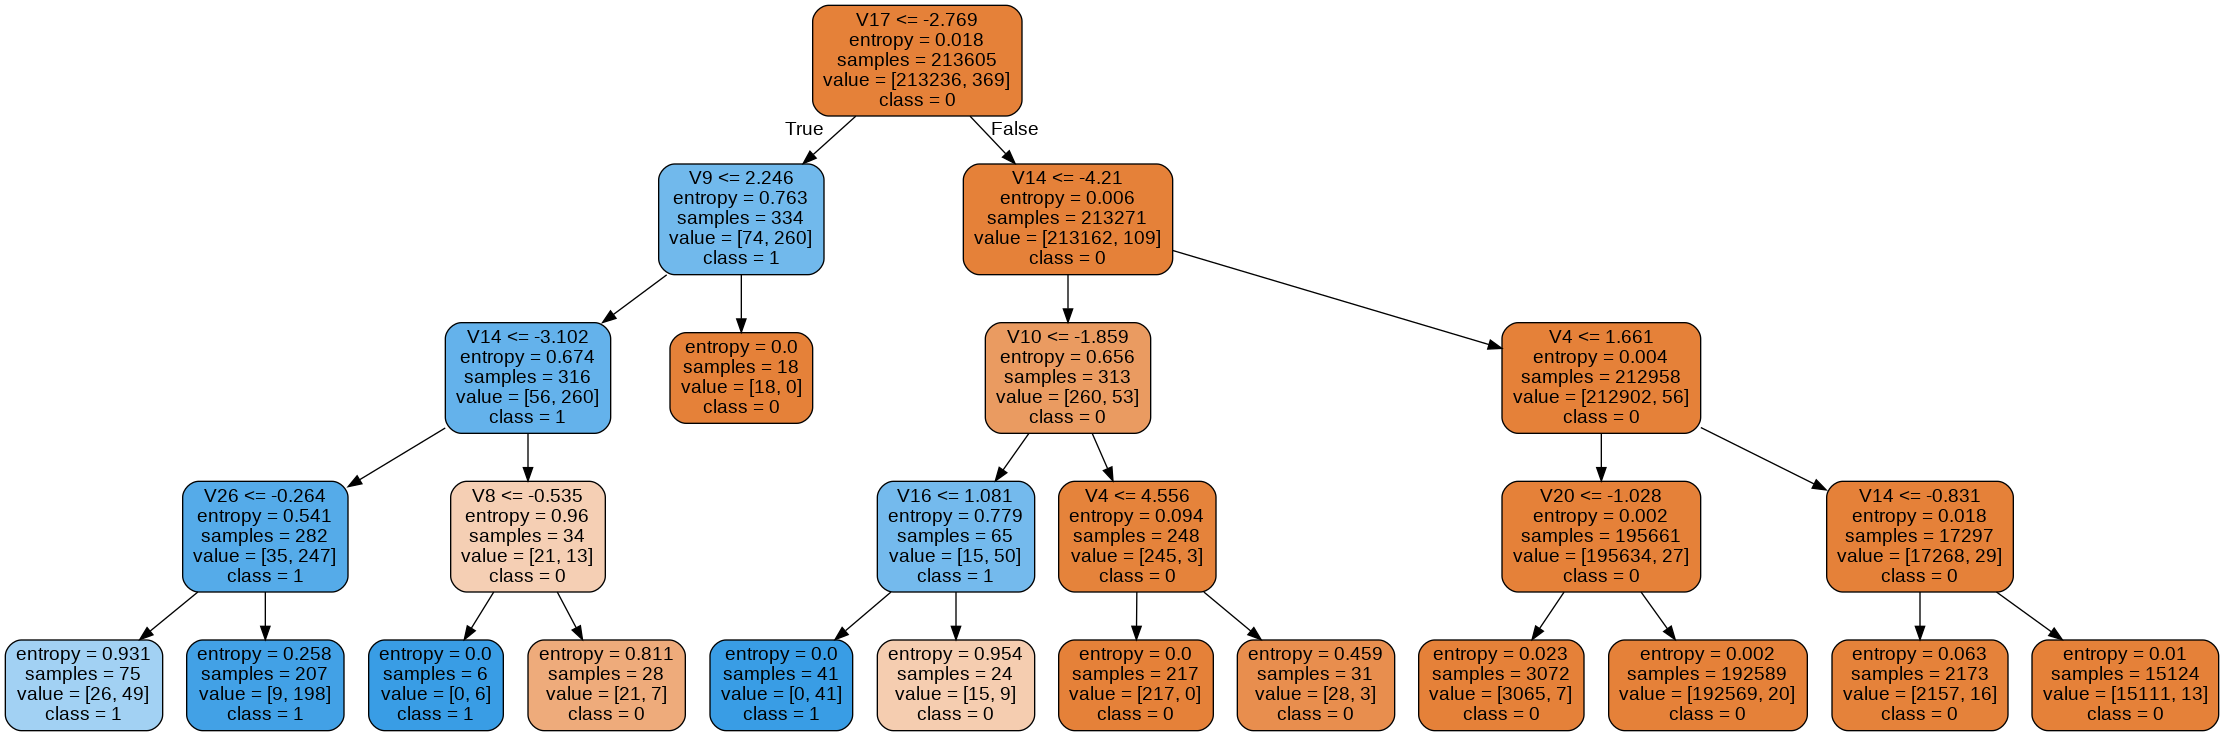

In [27]:
# create DOT 
dot = export_graphviz(DecisionTreeModel, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plot
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

## **XGBoost**

In [28]:
XGBModel = XGBClassifier()
XGBModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.89      0.77      0.83       123

    accuracy                           1.00     71202
   macro avg       0.94      0.89      0.91     71202
weighted avg       1.00      1.00      1.00     71202



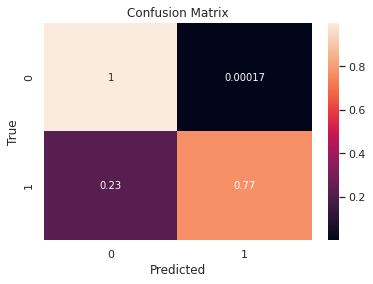

ROC AUC Score: 0.8861


In [29]:
# make predictions
y_pred_XGB = XGBModel.predict(X_test)

## print report 
def report(pred):
    print(classification_report(y_test, y_pred_XGB))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_XGB, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_XGB), 4)}')

report(XGBModel)

## Evaluate model performance


In [30]:
Comparacao = pd.DataFrame(data={
'labels': ['Accuracy', 'Precision', 'Recall', 'F1_score', 'roc_auc'],
'LogisticRegressionModel': [accuracy_score(y_test, y_pred_LR), precision_score(y_test, y_pred_LR), recall_score(y_test, y_pred_LR), f1_score(y_test, y_pred_LR), roc_auc_score(y_test, y_pred_LR)],
'SVMModel': [accuracy_score(y_test, y_pred_SVM), precision_score(y_test, y_pred_SVM), recall_score(y_test, y_pred_SVM), f1_score(y_test, y_pred_SVM), roc_auc_score(y_test, y_pred_SVM)],
'RandomForestModel': [accuracy_score(y_test, y_pred_RF), precision_score(y_test, y_pred_RF), recall_score(y_test, y_pred_RF), f1_score(y_test, y_pred_RF), roc_auc_score(y_test, y_pred_RF)],
'XGBoost': [accuracy_score(y_test, y_pred_XGB), precision_score(y_test, y_pred_XGB), recall_score(y_test, y_pred_XGB), f1_score(y_test, y_pred_XGB), roc_auc_score(y_test, y_pred_XGB)],
'DecisionTreeModel': [accuracy_score(y_test, y_pred_DT), precision_score(y_test, y_pred_DT), recall_score(y_test, y_pred_DT), f1_score(y_test, y_pred_DT), roc_auc_score(y_test, y_pred_DT)],
}).set_index('labels')
Comparacao.index.name = None

Comparacao

,LogisticRegressionModel,SVMModel,RandomForestModel,XGBoost,DecisionTreeModel
Accuracy,0.969313,0.983680,0.984312,0.999438,0.999354
Precision,0.048599,0.084732,0.089256,0.887850,0.846847
Recall,0.902439,0.861789,0.878049,0.772358,0.764228
F1_score,0.092231,0.154294,0.162041,0.826087,0.803419
roc_auc,0.935934,0.922840,0.931272,0.886094,0.881994


## Conclusions:

We create five supervised Machine Learning models to predict whether a credit card transaction is fraud or not: 

* Logistic Regression 
* SVM - Support Vector Machine 
* Random Forest 
* XGBoost 
* Decision Tree

After analyzing the comparative table, with the performance of the metrics of each one, it is possible to observe:

1. All models are more than 95% accurate results. We know that accuracy indicates the general performance of the model. That is among all classifications predicts how many the model classified correctly. However, for this type of problem, it is not so interesting to analyze only the accuracy because we can come across a model that hit the real negatives and not so much the true positives, which is our real goal. Additionally, this is not a good metric for data as unbalanced as this dataset.

2. The model that presents the best result of the AUC / ROC curve was ** Logistic Regression **, with 0.935 followed closely by Random Forest with 0.931. We know that AUC is a way of summarizing the value of the ROC curve and demonstrates the quality of the model to distinguish between 0 and 1. More closer to 1, it demonstrates that the model can accurately distinguish the binomial.

3. For a fraud problem, we need to consider that **False Negatives** are considered more harmful than **False Positives**. That is, the model must find all possible fraudulent transactions even if it classifies some normal transactions as fraudulent. The recall result must be high because classifying normals transactions as fraudulent can cause a lot of wear and tear with customers. Thus, it is observed that the **Logistic Regression** model is one that presents a result considerably better than the other models, with 0.902.
Based on the analysis of the metrics above, we recommend using the classification model **Logistic Regression** .


* *Reminder*:

**True Positive:** Correct classification of the positive class, that is, you predicted positive and got it right. Ex: You predicted that a woman is pregnant and she is.

**True Negative:** Correct classification of negative class. That is, you predicted negative and got it right. Ex: You predicted that a man is not pregnant and he is not.

**False Positive (Error Type I):** Error in which the model predicted the Positive class when the real value was negative class, that is, you predicted positive and missed. Ex: You predicted that a man is pregnant, but in fact, he is not.

**False Negative (Error Type II):** Error in which the model predicted the negative class when the real value was positive class, that is, you predicted negative and made a mistake. Ex: You predicted that a woman is not pregnant, but she is.








###### Color palette reference: https://xkcd.com/color/rgb/ 